In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras

Using TensorFlow backend.


# A Facial Expression Detector using CNN Algorithm


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D

In [3]:
import os
import cv2
import keras
import pickle
import numpy as np

In [4]:
IMG_SIZE=72

In [5]:
Dir="C:/Users/MOHIT CHVK/Desktop/new trash/FE/train"

In [6]:
CATEGORIES=["angry","disgust","fear","happy","neutral","sad","surprise"]
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(Dir,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [7]:
for category in CATEGORIES:
        path=os.path.join(Dir,category)
        print(path)

C:/Users/MOHIT CHVK/Desktop/new trash/FE/train\angry
C:/Users/MOHIT CHVK/Desktop/new trash/FE/train\disgust
C:/Users/MOHIT CHVK/Desktop/new trash/FE/train\fear
C:/Users/MOHIT CHVK/Desktop/new trash/FE/train\happy
C:/Users/MOHIT CHVK/Desktop/new trash/FE/train\neutral
C:/Users/MOHIT CHVK/Desktop/new trash/FE/train\sad
C:/Users/MOHIT CHVK/Desktop/new trash/FE/train\surprise


In [8]:
print(len(training_data))

35887


In [9]:
import random
random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
5
4
2
0
0
3
0


In [11]:
X=[]
y=[]

In [12]:
for features,label in training_data:
    X.append(features)
    y.append(label)

In [13]:
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [14]:
X.shape,len(y)

((35887, 72, 72, 1), 35887)

In [15]:
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

In [16]:
pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [17]:
import tensorflow as tf

In [18]:
X=pickle.load(open("X.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))

In [19]:
X=X/255.0

In [20]:
X[1]

array([[[0.16470588],
        [0.16862745],
        [0.17254902],
        ...,
        [0.25098039],
        [0.25098039],
        [0.25098039]],

       [[0.15686275],
        [0.16078431],
        [0.16470588],
        ...,
        [0.25098039],
        [0.25098039],
        [0.25098039]],

       [[0.14509804],
        [0.14901961],
        [0.15686275],
        ...,
        [0.25490196],
        [0.25490196],
        [0.25098039]],

       ...,

       [[0.22745098],
        [0.22745098],
        [0.23137255],
        ...,
        [0.37647059],
        [0.36862745],
        [0.36078431]],

       [[0.21960784],
        [0.21960784],
        [0.21568627],
        ...,
        [0.34901961],
        [0.34509804],
        [0.34117647]],

       [[0.21568627],
        [0.20784314],
        [0.20392157],
        ...,
        [0.3254902 ],
        [0.32156863],
        [0.32156863]]])

In [21]:
X.shape

(35887, 72, 72, 1)

In [22]:
model=Sequential()

In [23]:
model.add(Conv2D(32,(3,3),padding="same",kernel_initializer="he_normal",input_shape=X.shape[1:]))
model.add(Activation("elu"))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding="same",kernel_initializer="he_normal",input_shape=X.shape[1:]))
model.add(Activation("elu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding="same",kernel_initializer="he_normal"))
model.add(Activation("elu"))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding="same",kernel_initializer="he_normal"))
model.add(Activation("elu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding="same",kernel_initializer="he_normal"))
model.add(Activation("elu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding="same",kernel_initializer="he_normal"))
model.add(Activation("elu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding="same",kernel_initializer="he_normal"))
model.add(Activation("elu"))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding="same",kernel_initializer="he_normal"))
model.add(Activation("elu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation("elu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation("elu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(7,kernel_initializer="he_normal")) 
model.add(Activation("softmax"))

model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 72, 72, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)      

In [88]:
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=["accuracy"])

In [89]:
model.fit(X,y,batch_size=32,epochs=25, validation_split=0.1)

Train on 32298 samples, validate on 3589 samples
Epoch 1/1
32298/32298 [==============================] - 191s 6ms/step - loss: 0.3052 - accuracy: 0.9002 - val_loss: 1.4298 - val_accuracy: 0.6283


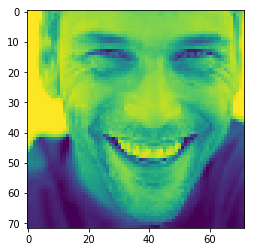

In [35]:
def image(filepath):
    img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array
plt.imshow(image('C:/Users/MOHIT CHVK/Desktop/new trash/sml.jpg'))

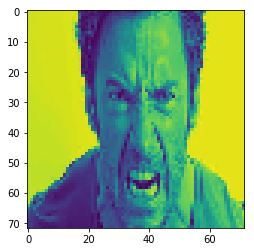

In [37]:
plt.imshow(image('C:/Users/MOHIT CHVK/Desktop/new trash/ang.jpg'))

In [65]:
def prepare(filepath):
    img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [85]:
prediction=model.predict([prepare('C:/Users/MOHIT CHVK/Desktop/new trash/ang.jpg')])
prediction

array([[1.00000000e+00, 0.00000000e+00, 1.67322210e-23, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.46678795e-24]], dtype=float32)

In [86]:
print("It's a gesture of :")
for i in range(0,3):
    if prediction[0][i]==1:
        if i==0:
            print("angry")
        elif i>0 and i<=1:
            print("disgust")
        elif i>1 and i<=2:
            print("fear")
        elif i>2 and i<=3:
            print("happy")
        elif i>3 and i<=4:
            print("neutral")
        elif i>4 and i<=5:
            print("sad")
        else:
            print("surprise")


It's a gesture of :
angry
